In [1]:
import pandas as pd

# Path to the CSV file
csv_path = 'HAM10000_metadata.csv'
df = pd.read_csv(csv_path)

In [2]:
# Display first rows
print(df.head())

# Information about data types and missing values
print(df.info())

# Statistical summary
print(df.describe())


     lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB
None
               age
count  9958.000000
mean  

In [3]:
# Check for missing values
print(df.isnull().sum())

# Example: Remove rows with missing values
df = df.dropna()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64


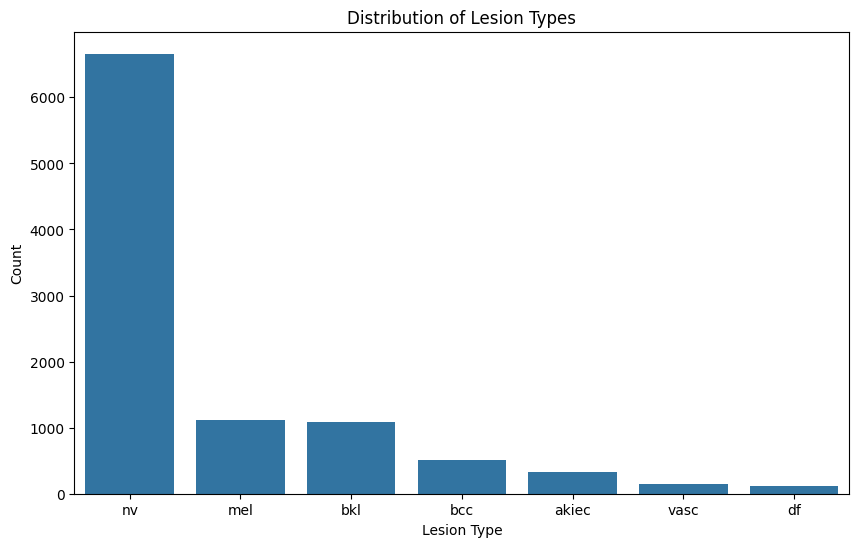

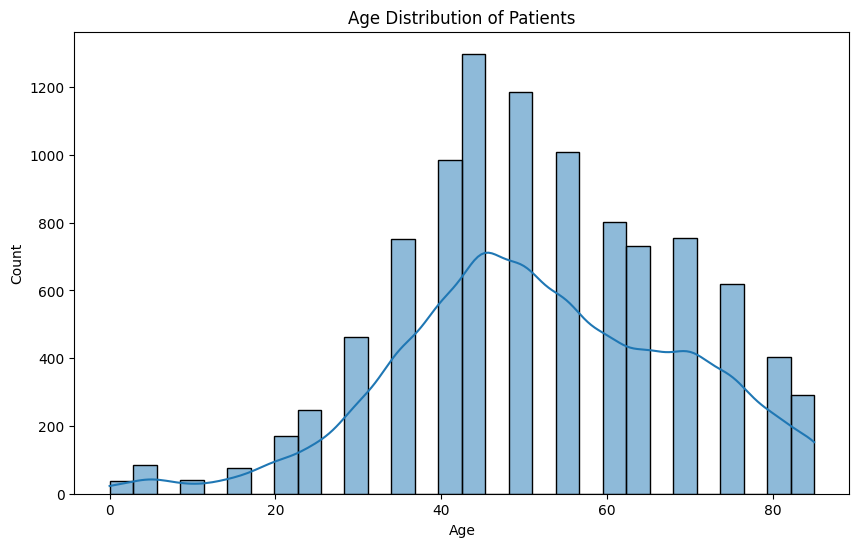

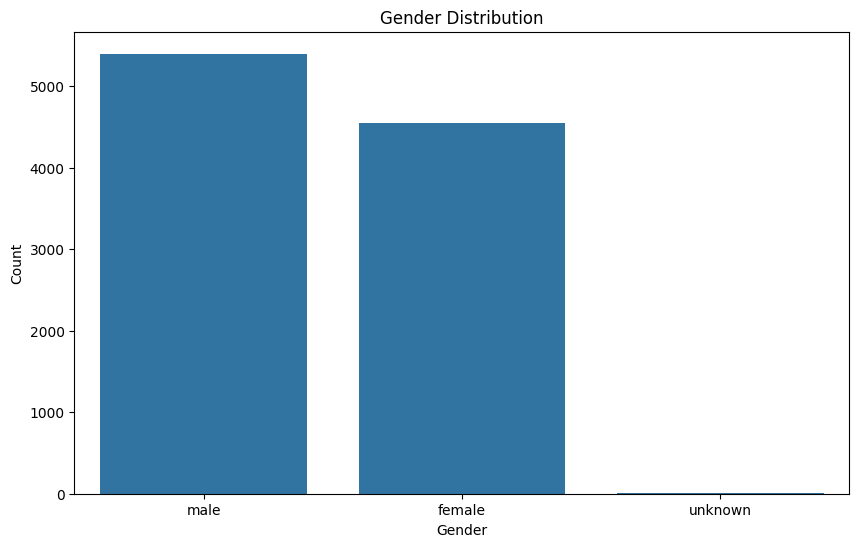

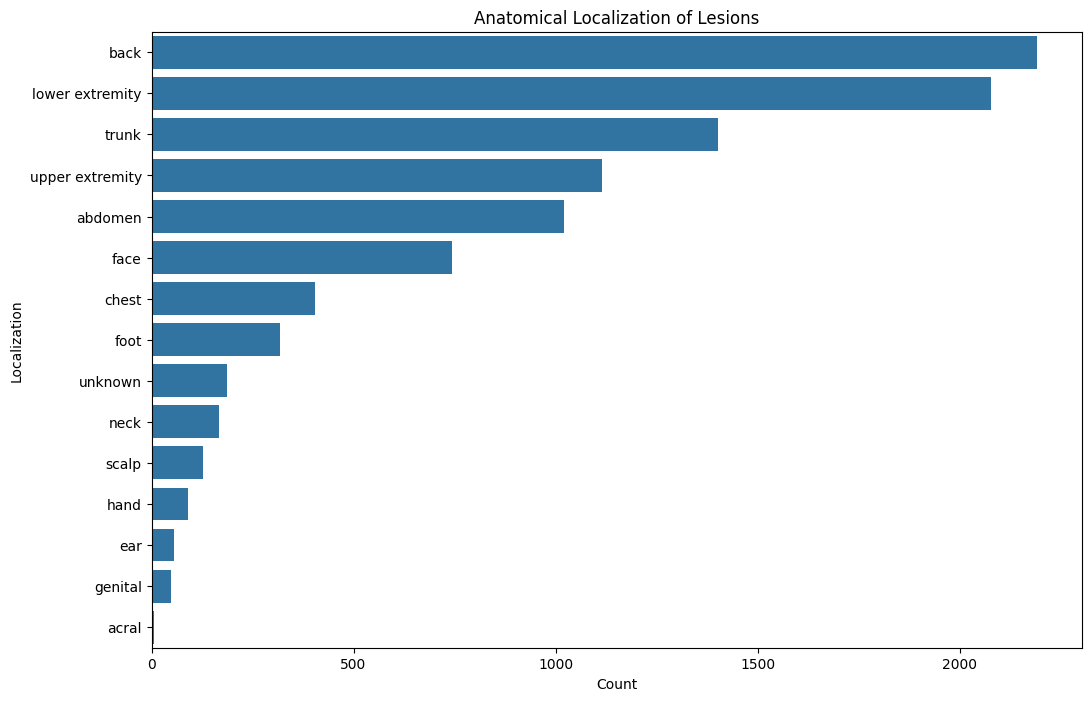

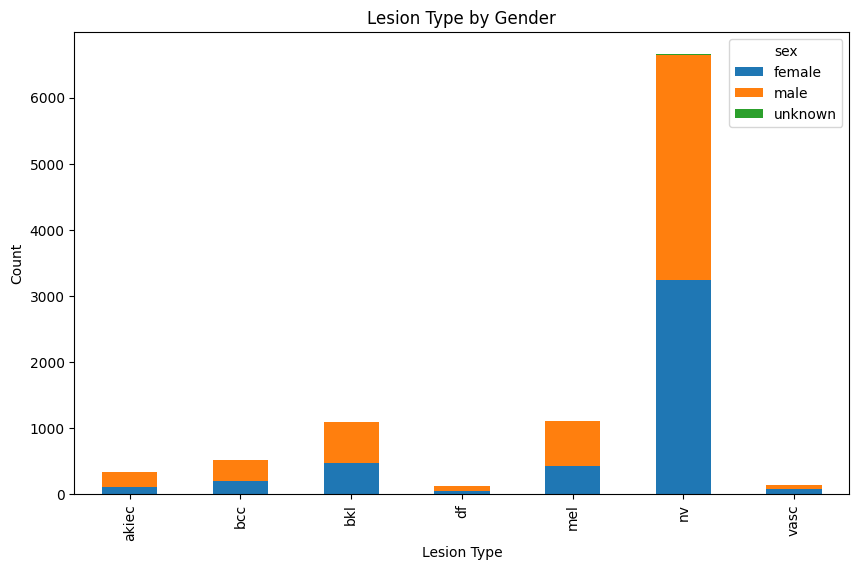

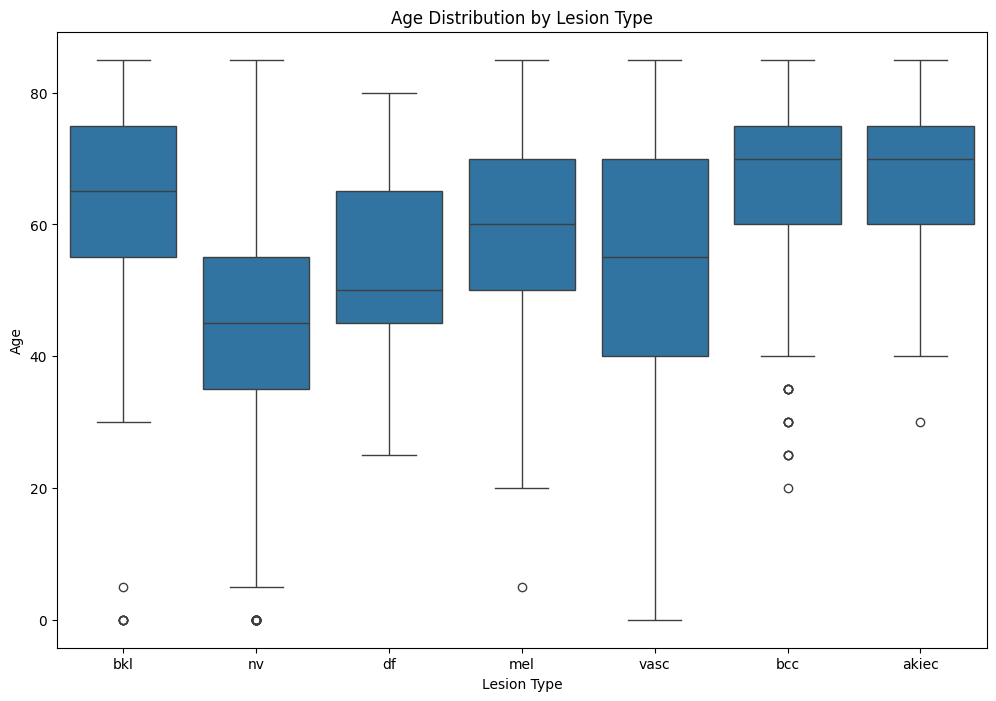

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of different lesion types
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='dx', order=df['dx'].value_counts().index)
plt.title('Distribution of Lesion Types')
plt.xlabel('Lesion Type')
plt.ylabel('Count')
plt.show()

# Age distribution of patients
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Gender distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='sex')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Anatomical localization of lesions
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='localization', order=df['localization'].value_counts().index)
plt.title('Anatomical Localization of Lesions')
plt.xlabel('Count')
plt.ylabel('Localization')
plt.show()

# Crosstab of lesion type and gender
pd.crosstab(df['dx'], df['sex']).plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Lesion Type by Gender')
plt.xlabel('Lesion Type')
plt.ylabel('Count')
plt.show()

# Age distribution by lesion type
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='dx', y='age')
plt.title('Age Distribution by Lesion Type')
plt.xlabel('Lesion Type')
plt.ylabel('Age')
plt.show()


dx
nv       66.880900
mel      11.156859
bkl      10.935931
bcc       5.161679
akiec     3.283792
vasc      1.425989
df        1.154850
Name: proportion, dtype: float64


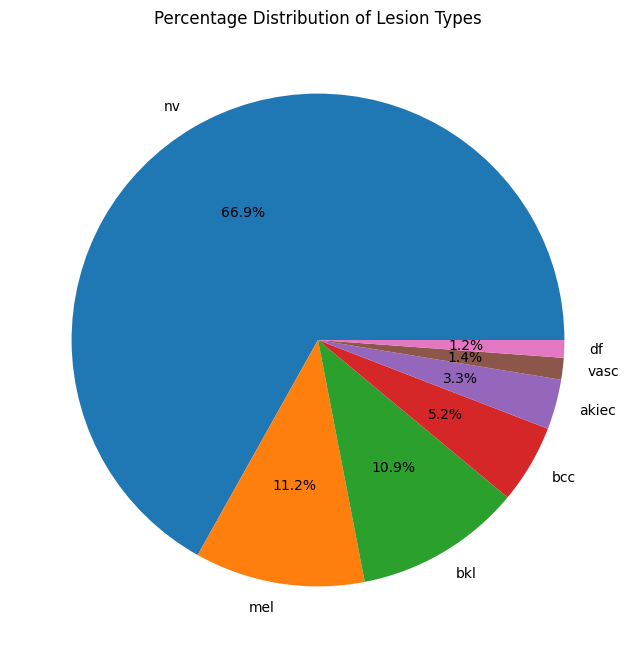

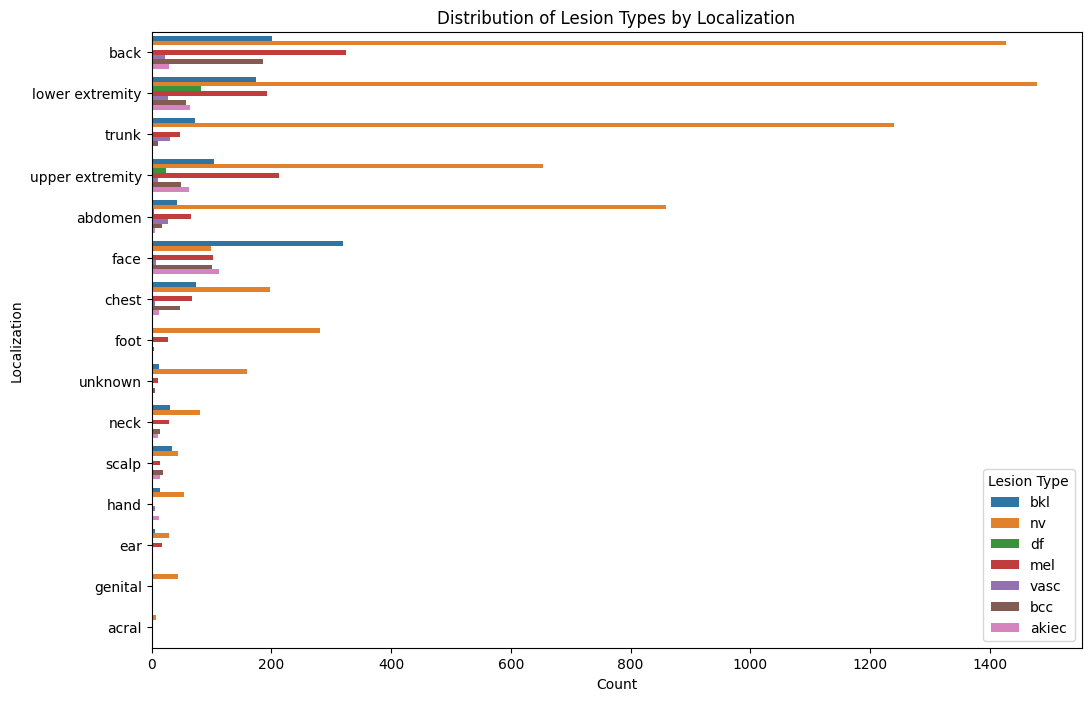

In [5]:

# Percentage distribution of lesion types
lesional_distribution = df['dx'].value_counts(normalize=True) * 100
print(lesional_distribution)
lesional_distribution.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Percentage Distribution of Lesion Types')
plt.ylabel('')
plt.show()

# Distribution of lesion types by localization
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='localization', hue='dx', order=df['localization'].value_counts().index)
plt.title('Distribution of Lesion Types by Localization')
plt.xlabel('Count')
plt.ylabel('Localization')
plt.legend(title='Lesion Type')
plt.show()

C:\Users\tillb\AppData\Local\Temp\ipykernel_36396\22220558.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Gender', title_fontsize=12, fontsize=10)


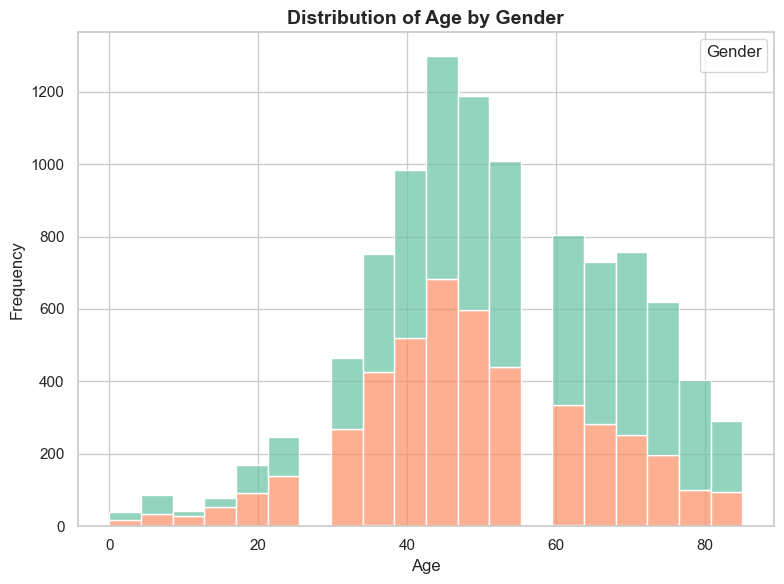

<Figure size 1000x600 with 0 Axes>

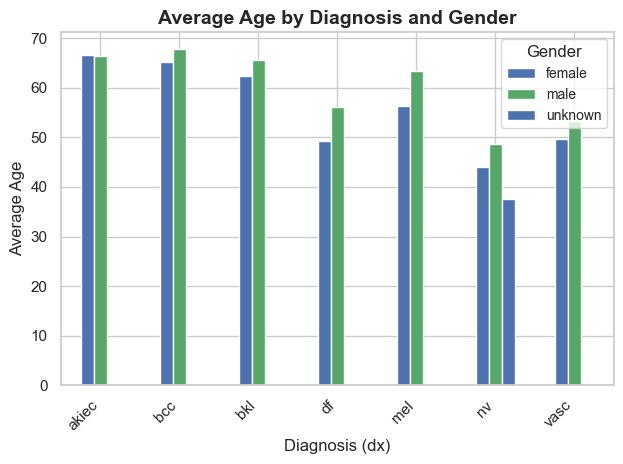

C:\Users\tillb\AppData\Local\Temp\ipykernel_36396\22220558.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='localization', y='age', palette='Set2')


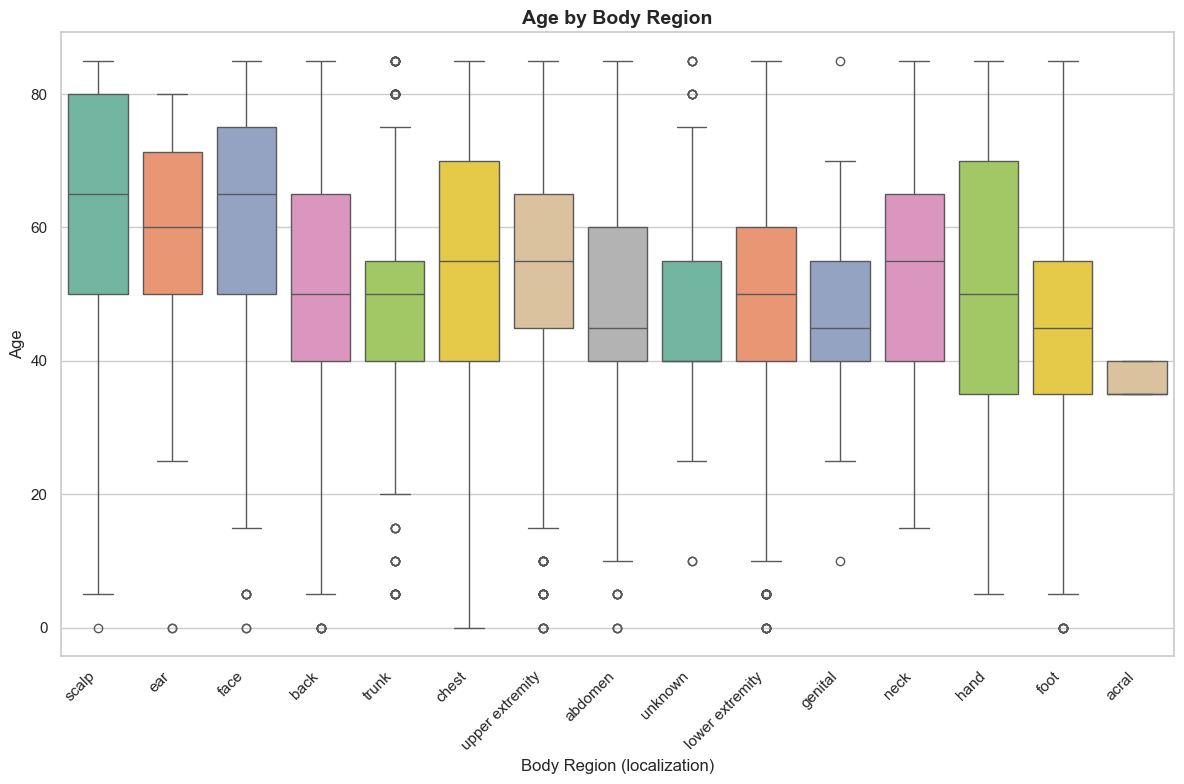

C:\Users\tillb\AppData\Local\Temp\ipykernel_36396\22220558.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='dx', y='age', palette='Set2')


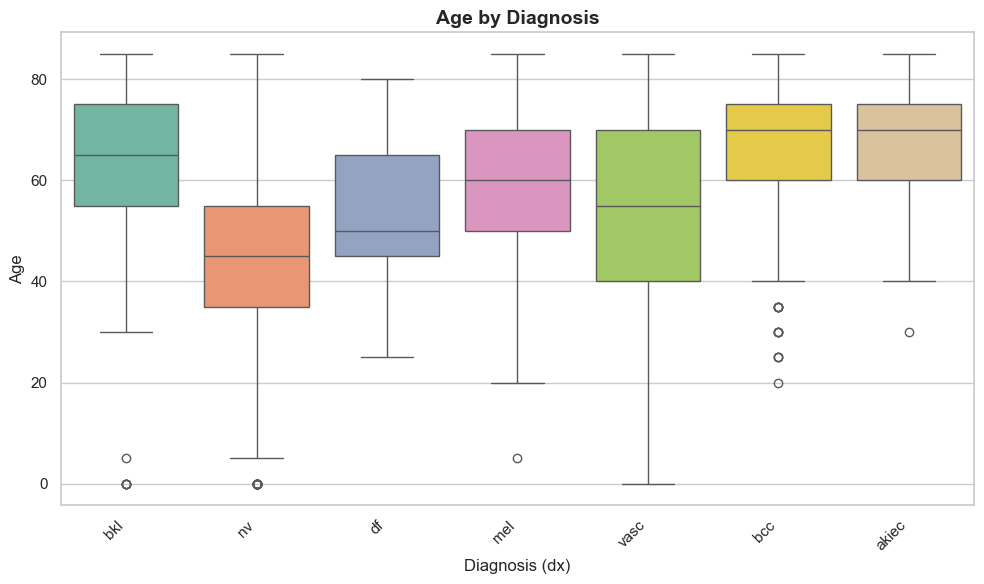

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn-Theme setzen (für ein schöneres Standard-Layout)
sns.set_theme(style="whitegrid")

# 1. Distribution of Age by Gender
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='age', hue='sex', multiple='stack', kde=False, bins=20, alpha=0.7, palette="Set2")
plt.title('Distribution of Age by Gender', fontsize=14, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title='Gender', title_fontsize=12, fontsize=10)
plt.tight_layout()
plt.show()

# 2. Average Age by Diagnosis and Gender
avg_age_dx_gender = df.pivot_table(values='age', index='dx', columns='sex', aggfunc='mean')

plt.figure(figsize=(10, 6))
avg_age_dx_gender.plot(kind='bar', color=['#4C72B0', '#55A868'])
plt.title('Average Age by Diagnosis and Gender', fontsize=14, fontweight='bold')
plt.xlabel('Diagnosis (dx)', fontsize=12)
plt.ylabel('Average Age', fontsize=12)
plt.legend(title='Gender', title_fontsize=12, fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Age by Body Region (Localization)
plt.figure(figsize=(12, 8))
# Für Boxplots mit schönerem Styling empfiehlt sich sns.boxplot
sns.boxplot(data=df, x='localization', y='age', palette='Set2')
plt.title('Age by Body Region', fontsize=14, fontweight='bold')
plt.xlabel('Body Region (localization)', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 4. Age by Diagnosis
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='dx', y='age', palette='Set2')
plt.title('Age by Diagnosis', fontsize=14, fontweight='bold')
plt.xlabel('Diagnosis (dx)', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
#

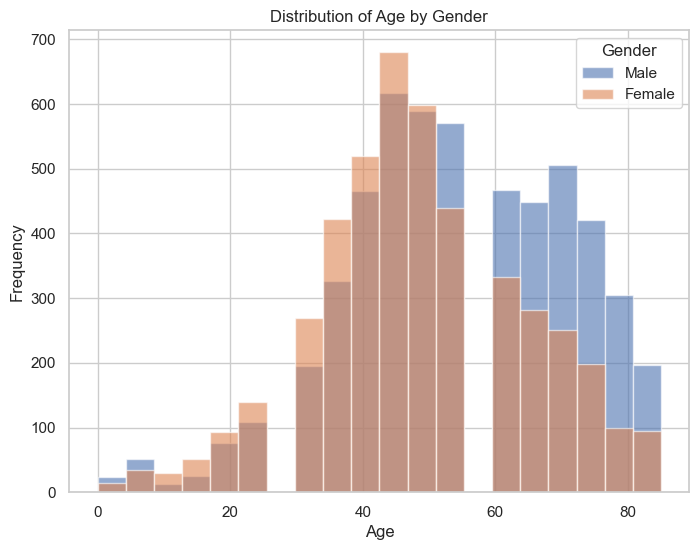

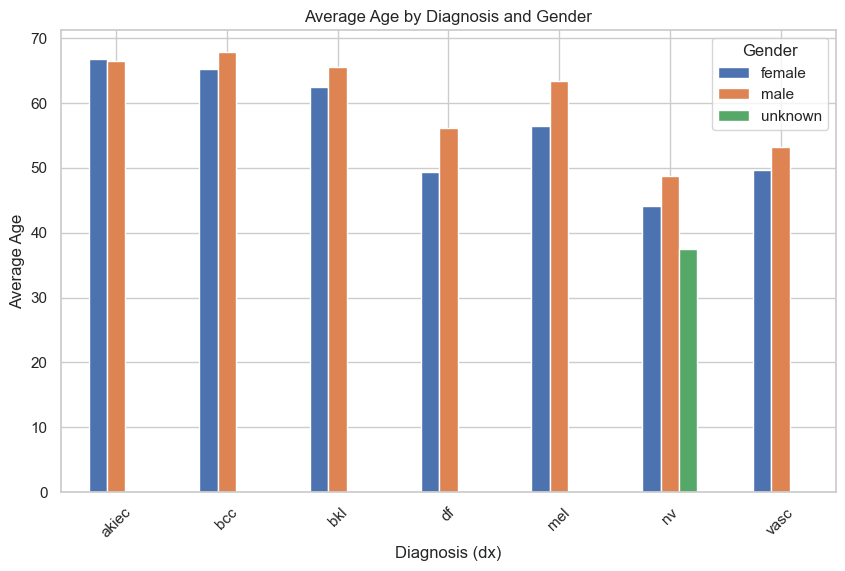

<Figure size 1200x800 with 0 Axes>

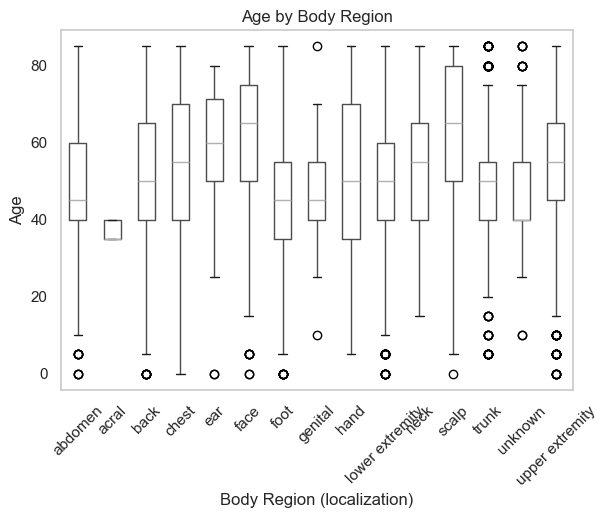

<Figure size 1000x600 with 0 Axes>

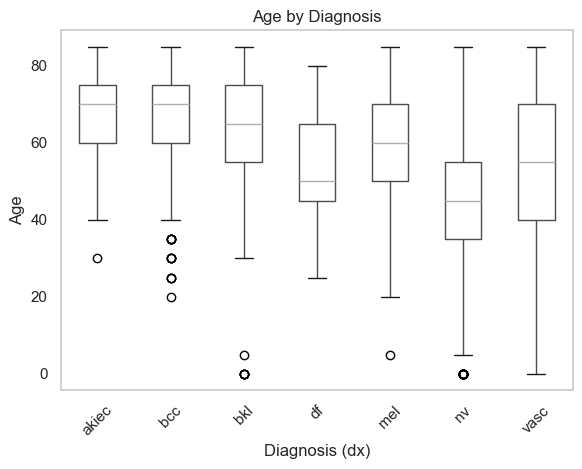

In [7]:
# 1. Distribution of Age by Gender
plt.figure(figsize=(8, 6))
df[df['sex'] == 'male']['age'].plot(kind='hist', alpha=0.6, label='Male', bins=20)
df[df['sex'] == 'female']['age'].plot(kind='hist', alpha=0.6, label='Female', bins=20)
plt.title('Distribution of Age by Gender')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Gender')
plt.show()

# 2. Average Age by Diagnosis and Gender
avg_age_dx_gender = df.pivot_table(values='age', index='dx', columns='sex', aggfunc='mean')
avg_age_dx_gender.plot(kind='bar', figsize=(10, 6))
plt.title('Average Age by Diagnosis and Gender')
plt.xlabel('Diagnosis (dx)')
plt.ylabel('Average Age')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.show()

# 3. Age by Body Region (Localization)
plt.figure(figsize=(12, 8))
df.boxplot(column='age', by='localization', grid=False, rot=45)
plt.title('Age by Body Region')
plt.suptitle('')  # Remove automatic title
plt.xlabel('Body Region (localization)')
plt.ylabel('Age')
plt.show()

# 4. Age by Diagnosis
plt.figure(figsize=(10, 6))
df.boxplot(column='age', by='dx', grid=False, rot=45)
plt.title('Age by Diagnosis')
plt.suptitle('')  # Remove automatic title
plt.xlabel('Diagnosis (dx)')
plt.ylabel('Age')
plt.show()